In [1]:
import sys
sys.path.append('../')
%load_ext autotime
import numpy as np

time: 108 ms (started: 2024-05-01 16:11:38 -07:00)


In [2]:
import plotters.plot_rydberg_dynamics as rydnamics

time: 8.37 s (started: 2024-05-01 16:11:40 -07:00)


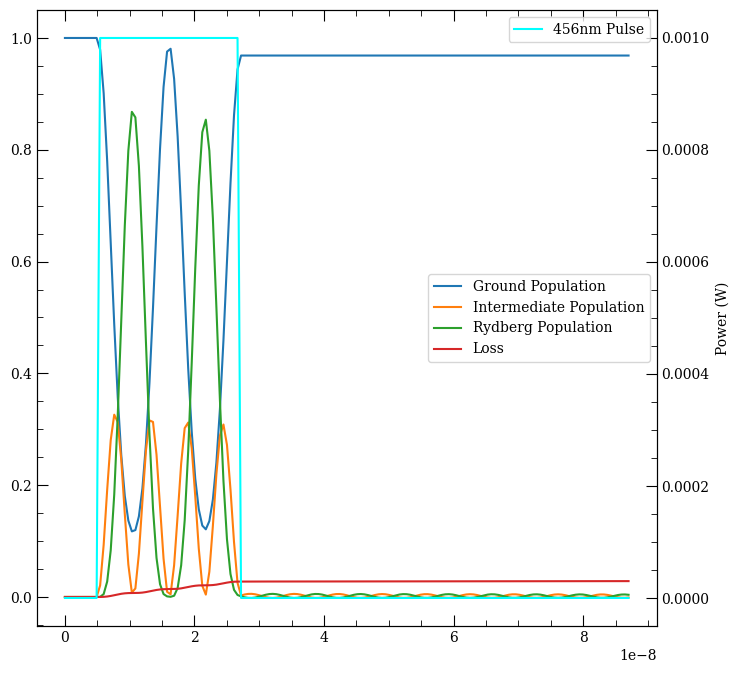

time: 10.2 s (started: 2024-05-01 16:08:21 -07:00)


In [3]:
# Test run Lindblad solver
rydnamics.plot_lindblad_dynamics()

# On-Resonance Excitation to Rydberg State
We want to evaluate:
1. With CW coupling light (1064nm) to the Rydberg state, does selecting a fast probe pulse allow $\pi$ pulses to the Rydberg state with minimal loss? If so, we could potential get larger Rabi rates with less power due to the fact that we are not detuned (as long as the loss is low).
2. The on-resonance CW coupling light should make the loss very large. Therefore, we need to think about pulsing the coupling light to turn off the coupling back to the excited state and shut off the loss. We can use either a "conventional" pulse scheme or a STIRAP pulse scheme. Which one is better? Seeking less laser power, lower loss, high Rabi rate.

## Fast Probe, CW Coupling

100%|███████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.82s/it]


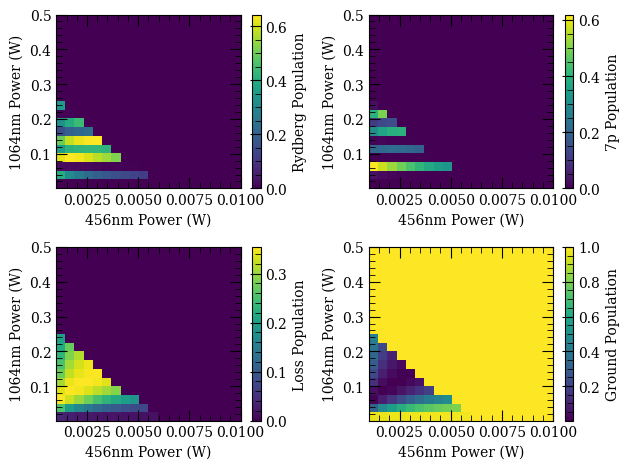

time: 1min 6s (started: 2024-05-01 16:08:31 -07:00)


In [4]:
coupling_powers = np.linspace(0.001, 0.5, 20)
probe_peak_power = np.linspace(0.001, 0.01, 20)
rydnamics.plot_lindblad_fast_probe(coupling_powers=coupling_powers,
									   probe_peak_power=probe_peak_power)

## Conventional Pulse Scheme

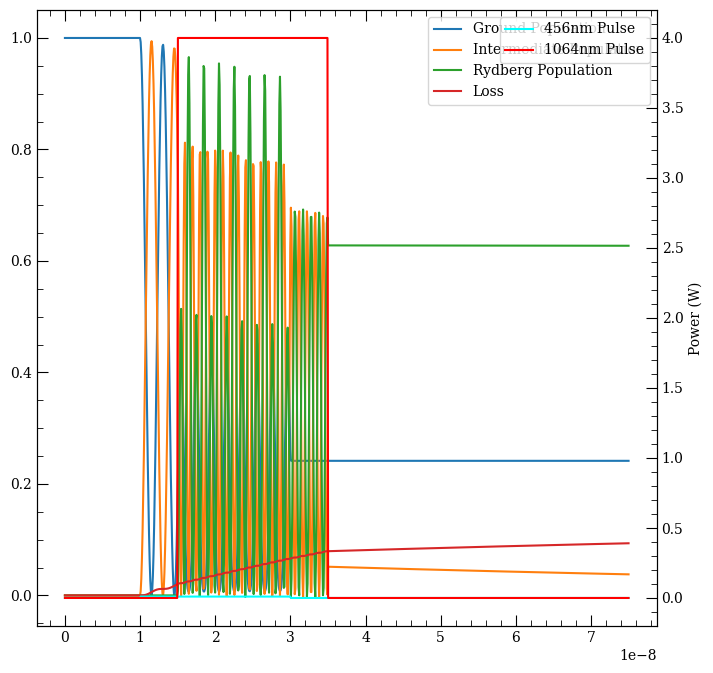

time: 10.1 s (started: 2024-05-01 16:09:37 -07:00)


In [5]:
rydnamics.plot_duo_pulse(probe_duration=0, probe_delay=10e-9, probe_hold=20e-9,
        probe_peak_power=10e-3, couple_duration=0, couple_delay=15e-9,
        couple_hold=20e-9, couple_peak_power=4,
        Delta=0.0)

100%|███████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.70it/s]


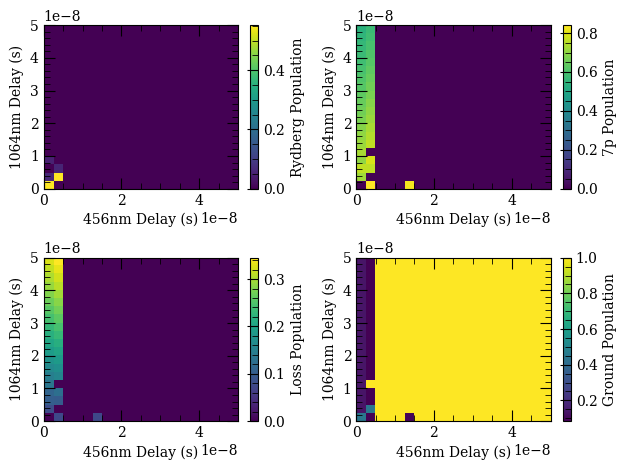

time: 15.3 s (started: 2024-05-01 16:11:53 -07:00)


In [3]:
probe_delays = np.linspace(0, 50e-9, 20)
couple_delays = np.linspace(0, 50e-9, 20)
rydnamics.plot_lindblad_duo_pulse(probe_delays=probe_delays,
                            couple_delays=couple_delays,
                            probe_peak_power=20e-3, couple_peak_power=5)

## STIRAP Pulse Scheme